# 介绍

# Show Me The Code

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
%matplotlib inline

from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY,YEARLY

#import matplotlib
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import datetime
import numpy as np
from pandas import DataFrame
from numpy import row_stack,column_stack
import pandas

In [6]:
df=ts.get_hist_data('601857',start='2016-06-15',end='2018-01-12')
dd=df[['open','high','low','close']]

dd1=dd.sort_index()

dd2=dd1.values.flatten()

dd3=pandas.DataFrame(dd1['close'])

In [7]:
def load_data(df, sequence_length=10, split=0.8):
    
    #df = pd.read_csv(file_name, sep=',', usecols=[1])
    #data_all = np.array(df).astype(float)
    
    data_all = np.array(df).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
    #np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]

    return train_x, train_y, test_x, test_y, scaler

In [8]:
def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=6, return_sequences=True))
    #model.add(LSTM(6, input_dim=1, return_sequences=True))
    #model.add(LSTM(6, input_shape=(None, 1),return_sequences=True))
    
    """
    #model.add(LSTM(input_dim=1, output_dim=6,input_length=10, return_sequences=True))
    #model.add(LSTM(6, input_dim=1, input_length=10, return_sequences=True))
    model.add(LSTM(6, input_shape=(10, 1),return_sequences=True))
    """
    print(model.layers)
    #model.add(LSTM(100, return_sequences=True))
    #model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))

    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [9]:
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y

Instructions for updating:
Colocations handled automatically by placer.


/root/tools/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/root/tools/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=6)`
  after removing the cwd from sys.path.


/root/tools/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/root/tools/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Instructions for updating:
Use tf.cast instead.
Train on 183 samples, validate on 21 samples
Epoch 1/300
183/183 [==============================] - 8s 42ms/step - loss: 0.2249 - val_loss: 0.1723
Epoch 2/300
183/183 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.1169
Epoch 3/300
183/183 [==============================] - 0s 2ms/step - loss: 0.1042 - val_loss: 0.0667
Epoch 4/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0270
Epoch 5/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0077
Epoch 6/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0053
Epoch 7/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0061
Epoch 8/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0056
Epoch 9/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.00

Epoch 79/300
183/183 [==============================] - 0s 932us/step - loss: 0.0114 - val_loss: 0.0103
Epoch 80/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0040
Epoch 81/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 82/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0040
Epoch 83/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 84/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0039
Epoch 85/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 86/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0039
Epoch 87/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 88/300
183/183 [==============================] - 0s 2ms/step - loss: 0.01

Epoch 159/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 160/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 161/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 162/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 163/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 164/300
183/183 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 165/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 166/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0039
Epoch 167/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 168/300
183/183 [==============================] - 0s 2ms/step - lo

Epoch 239/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 240/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0042
Epoch 241/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 242/300
183/183 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0042
Epoch 243/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 244/300
183/183 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0042
Epoch 245/300
183/183 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 246/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0063 - val_loss: 0.0042
Epoch 247/300
183/183 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 248/300
183/183 [==============================] - 0s 2ms/step - lo

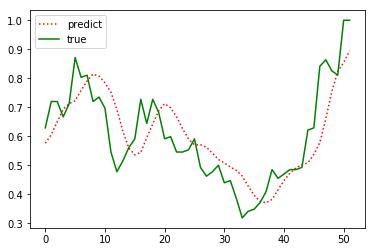

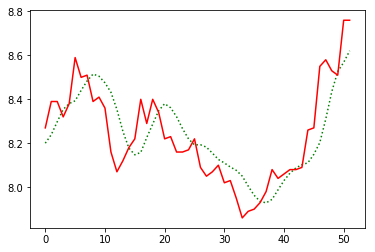

In [11]:
#train_x, train_y, test_x, test_y, scaler = load_data('international-airline-passengers.csv')
train_x, train_y, test_x, test_y, scaler =load_data(dd3, sequence_length=10, split=0.8)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scaler.inverse_transform([[i] for i in predict_y])
test_y = scaler.inverse_transform(test_y)
fig2 = plt.figure(2)
plt.plot(predict_y, 'g:')
plt.plot(test_y, 'r-')
plt.show()